In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import random

In [4]:
def kNearestNeighbors(input, i, k):
    distances = []
    sampleCount = input.shape[0]

    for j in range(sampleCount):
        #we don't consider a point as its own neighbor
        if i != j:
            euclideanDistance = np.linalg.norm(input[i] - input[j])  # i is the original position of the point , j is the position for every other point
            distances.append((j, euclideanDistance))

    distances.sort(key=lambda x:x[1])

    nearestNeighbors = []

    #getting k best neighbors
    for index in range(k):
        nearestNeighbors.append(distances[index][0])

    return nearestNeighbors


#generating synthetic samples
def populate(N, i, nearestNeighbors, samples, synthetics, newindex, imageReferences):
    attributeCount = samples.shape[1]

    for j in range(N):
        randomNeighbour = random.choice(nearestNeighbors)

        for attr in range(attributeCount):
            #difference of each pixel of original and random array
            difference = samples[randomNeighbour][attr] - samples[i][attr]

            gap = random.uniform(0, 1)

            synthetics[newindex][attr] = samples[i][attr] + (gap * difference)

        #Store the image reference with respect to its source and destination
        imageReferences.append((i,newindex))

        newindex+=1


def SMOTE(samples, N, k):

    sampleCount = samples.shape[0]
    syntheticCount = (N * sampleCount)

    attributeCount = samples.shape[1]

    #empty array of N times more rows and same columns as samples array
    synthetics = np.empty((syntheticCount, attributeCount))

    newIndex = 0
    imageReferences=[]

    for i in range(sampleCount):
        nearestNeighbors = kNearestNeighbors(samples, i, k)

        populate(N, i, nearestNeighbors, samples, synthetics, newIndex, imageReferences)

        newIndex += N  # Passed by value henece value of newindex needs to be incremented by N after every function call
    return synthetics, imageReferences


#reading file and getting label 3 data from it
def processFile(fileName):
    data = pd.read_csv(fileName)

    #filter those rows which have label of 3
    filtered_rows = []
    for index, row in data.iterrows():
        if row['label'] == 3:
            filtered_rows.append(row)

    #convert back to dataframe form (rows and columns)
    filteredData = pd.DataFrame(filtered_rows)

    #taking random sample of 100 images from the data
    label3Subset = filteredData.sample(n=100, random_state=10)

    #drop label column and return the values
    return label3Subset.drop('label', axis=1).values


def drawImages(pixelsArray):
    figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
    for i, plot in enumerate(axes.flatten()):
        img = pixelsArray[i].reshape(28, 28)
        plot.imshow(img, cmap='Blues')
        plot.set_title(f'Image {i+1}')
        plot.axis('off')
    plt.tight_layout()
    plt.show()

NON SYNTHETIC:


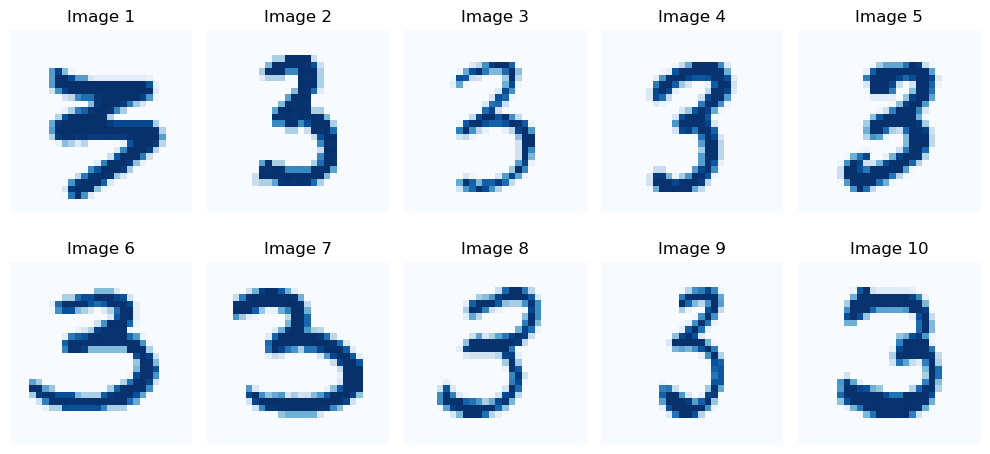

SYNTHETIC:


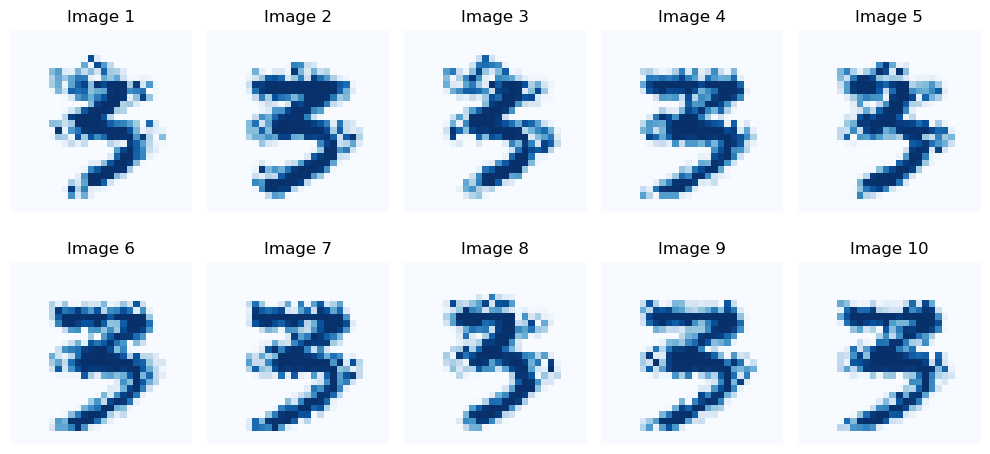

In [5]:
samples = processFile('train.csv')


print("NON SYNTHETIC:")
drawImages(samples)


N = 43
k = 4

syntheticImages, imageReferences = SMOTE(samples, N, k)


print("SYNTHETIC:")
drawImages(syntheticImages)